## K-Means(color compression)

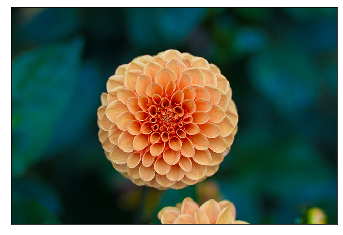

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [4]:
#check the dimension of the image
china.shape

(427, 640, 3)

In [5]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [6]:
#Reshaping the data to[n_samples x n_features] and rescale the colors so, that they lie b/w 0 and 1
data = china/255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [7]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [22]:
#Visualize these pixels in this color space, using a subset of 10000 pixels for efficiency
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
       colors = data
    
      # Choose a Random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])
    color = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green',xlim = (0, 1), ylim = (0, 1))
    ax[1].scatter(R, G, color = colors, marker = '.')
    ax[1].set(xlabel = "Red", ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
    fig.suptitle(title, size = 20);

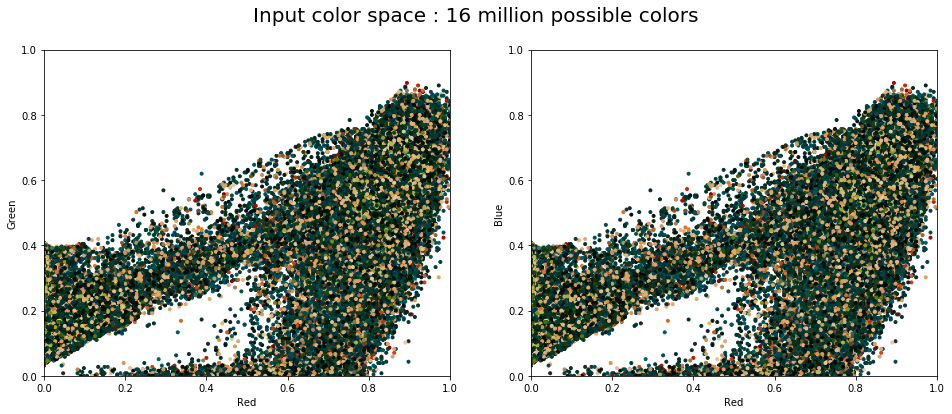

In [23]:
plot_pixels(data, title = 'Input color space : 16 million possible colors')

we will use KMeans clustering to create just 16 clusters for various colors and then apply them to the image. 
For this we use MiniBatchKMeans ( another version of KMeans)

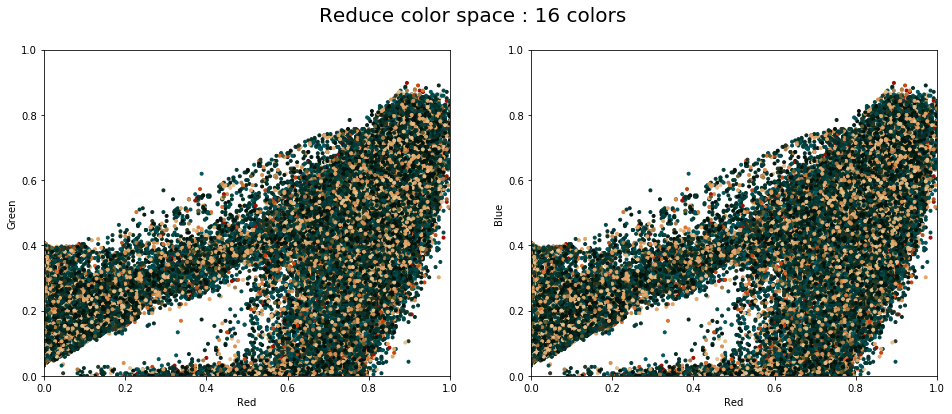

In [30]:
import warnings; warnings.simplefilter('ignore')  # fix numpy issues

# Reduce these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
Kmeans = MiniBatchKMeans(16)
Kmeans.fit(data)
new_colors = Kmeans.cluster_centers_[Kmeans.predict(data)]
plot_pixels(data, colors = new_colors, title = 'Reduce color space : 16 colors ')

Now we will apply newly created batch of clusters into the orignal image:-

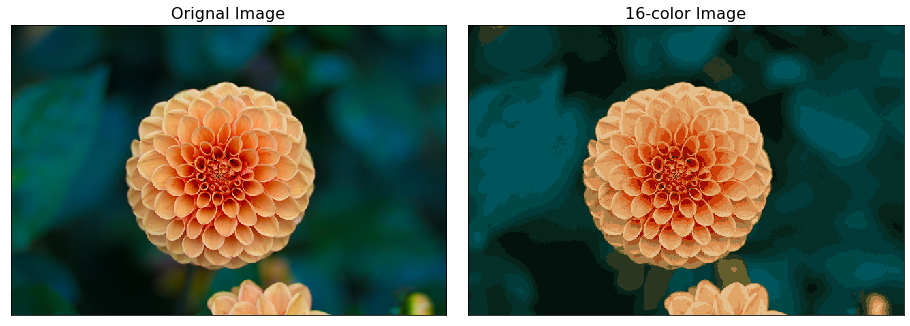

In [32]:
#Recoloring of orignal Pixels, each pixel is assigned the color of its closet cluster center

china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize = (16, 6),
                       subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Orignal Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);

## Another Example :-

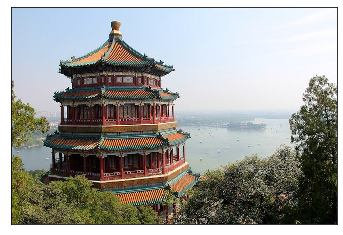

In [35]:
#import library and load the image:-
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [36]:
#Return the Dimension
china.shape

(427, 640, 3)

In [38]:
#Reshape the data to [n_samples * n_features], and rescaling so, that they lie b/w 0 and 1
data = china/255.0 #use 0.....1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [39]:
#Visualize these pixels in this color space, using a subset of 10000 pixels for efficency
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
        
    #Choose a random state
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green',xlim = (0, 1), ylim = (0, 1))
    ax[1].scatter(R, G, color = colors, marker = '.')
    ax[1].set(xlabel = "Red", ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
    fig.suptitle(title, size = 20);

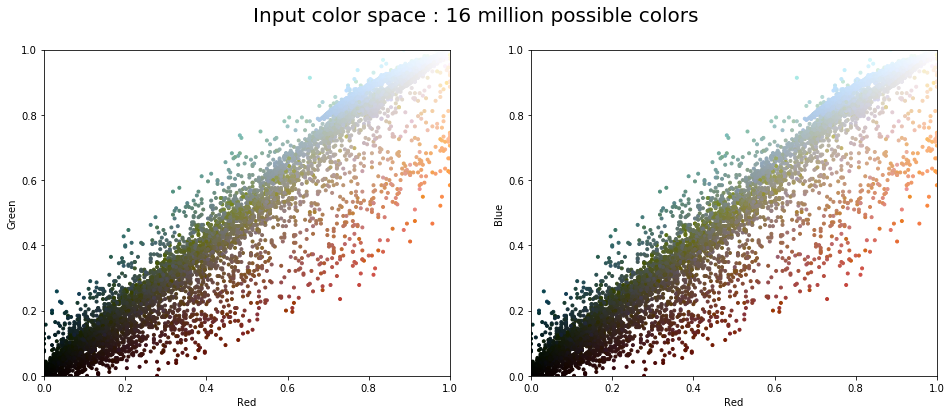

In [40]:
plot_pixels(data, title = 'Input color space : 16 million possible colors')

we will use KMeans clustering to create just 16 clusters for various colors and then apply them to the image. For this we use MiniBatchKMeans ( another version of KMeans)

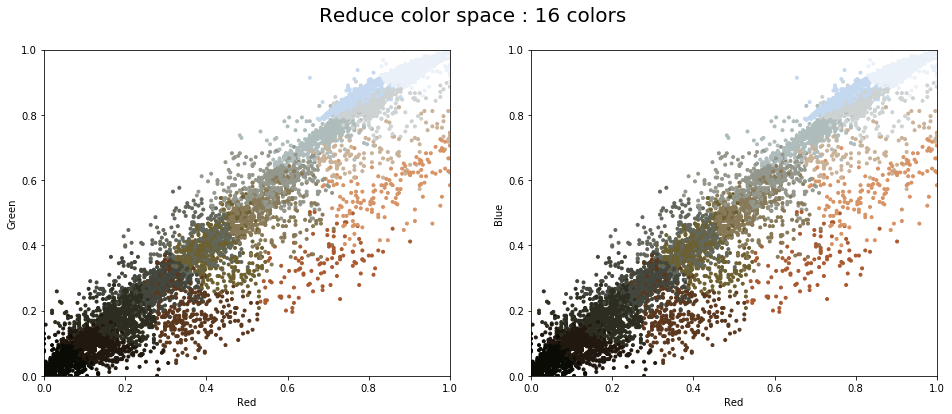

In [41]:
import warnings; warnings.simplefilter('ignore')  # fix numpy issues

# Reduce these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
Kmeans = MiniBatchKMeans(16)
Kmeans.fit(data)
new_colors = Kmeans.cluster_centers_[Kmeans.predict(data)]
plot_pixels(data, colors = new_colors, title = 'Reduce color space : 16 colors ')

Now we will apply newly created batch of clusters into the orignal image:-

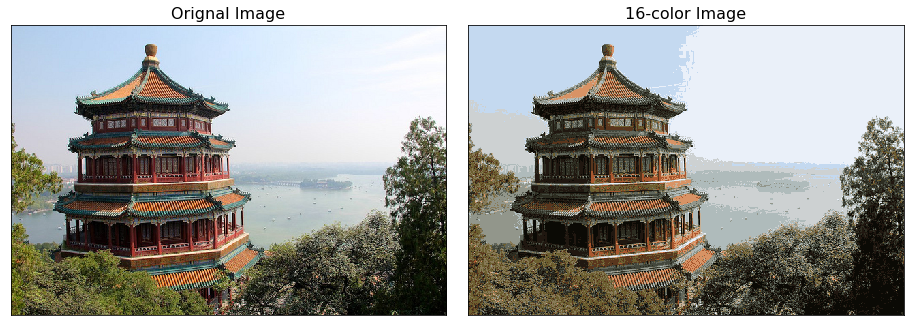

In [42]:
#Recoloring of orignal Pixels, each pixel is assigned the color of its closet cluster center

china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize = (16, 6),
                       subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Orignal Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);